# Using Keras Library for building Convolution Neural Networks

# Model for Image Classification

In [0]:
from keras.models import Sequential
classifier = Sequential()

In [0]:
#Adding convolutional layers to our model

from keras.layers import Conv2D

classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(64,64,3), activation='relu'))

In [0]:
from keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
from keras.layers import Flatten
classifier.add(Flatten())

In [0]:
from keras.layers import Dense
from keras.layers import Dropout
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=1, activation='sigmoid'))

In [0]:
classifier.compile( optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# Applying Transformation to Image
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 fill_mode='nearest',
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
#My google drive has been mounted to read data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Loading Test and Training data using flow from directory
#flow_from_directory takes the data frame from the specified path and generates batches of augmented normalized data.

training_set = train_datagen.flow_from_directory(
        directory="/content/drive/My Drive/dataset/training_set",
        target_size=(64, 64),      
        color_mode="rgb",
        batch_size=32,
        class_mode="binary",
        shuffle=True,
        seed=42)
test_set = test_datagen.flow_from_directory(
        directory="/content/drive/My Drive/dataset/test_set",
        target_size=(64, 64),       
        color_mode="rgb",
        batch_size=32,
        class_mode='binary',
        shuffle=True,
        seed=42)

Found 1599 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [0]:
from IPython.display import display 

classifier.fit_generator(
        training_set,
        steps_per_epoch=150,
        epochs=10,
        validation_data=test_set, validation_steps=50)

Epoch 1/10
150/150 [==============================] - 48s 323ms/step - loss: 0.2988 - acc: 0.8676 - val_loss: 0.6578 - val_acc: 0.7805
Epoch 2/10
150/150 [==============================] - 47s 313ms/step - loss: 0.3074 - acc: 0.8712 - val_loss: 0.7200 - val_acc: 0.7659
Epoch 3/10
150/150 [==============================] - 47s 315ms/step - loss: 0.2962 - acc: 0.8741 - val_loss: 0.6839 - val_acc: 0.7868
Epoch 4/10
150/150 [==============================] - 47s 313ms/step - loss: 0.3015 - acc: 0.8697 - val_loss: 0.6015 - val_acc: 0.7758
Epoch 5/10
150/150 [==============================] - 47s 315ms/step - loss: 0.2932 - acc: 0.8741 - val_loss: 0.5747 - val_acc: 0.7931
Epoch 6/10
150/150 [==============================] - 47s 317ms/step - loss: 0.2834 - acc: 0.8787 - val_loss: 0.6691 - val_acc: 0.7830
Epoch 7/10
150/150 [==============================] - 47s 312ms/step - loss: 0.2993 - acc: 0.8678 - val_loss: 0.6070 - val_acc: 0.7747
Epoch 8/10
150/150 [==============================] - 4

In [0]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

# Output prediction


Populating the interactive namespace from numpy and matplotlib


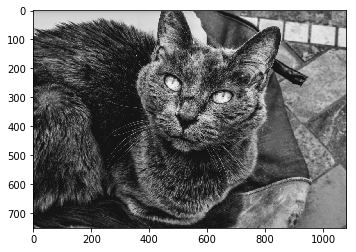

This is a cat.


In [0]:
import numpy as np
from PIL import Image

#Loading the image to be predicted:
from keras.preprocessing import image
test_image = image.load_img("/content/drive/My Drive/dataset/prediction_check/cats2.jpg",target_size=(64, 64) )
# Adding the channel
test_image = image.img_to_array(test_image)
# Adding the batch size as predict method expects
test_image = np.expand_dims(test_image, axis=0)
# Predicting the test image
result= classifier.predict(test_image)

#For displaying the image:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("/content/drive/My Drive/dataset/prediction_check/cats2.jpg")
imgplot = plt.imshow(img)
plt.show()
                 
#Printing the result:
rounded = [int(np.round(x)) for x in result]
if rounded == [0]:
  print("This is a cat.")
else:
  print("This is a dog.")